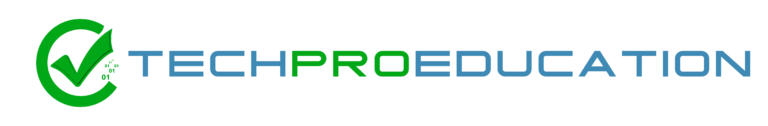

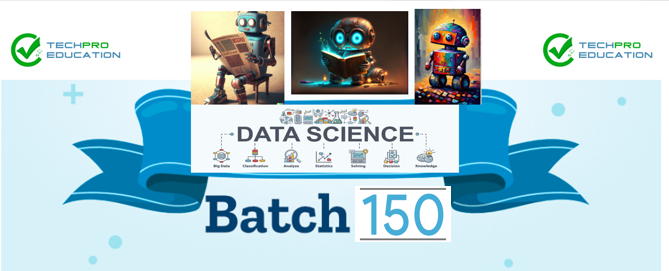

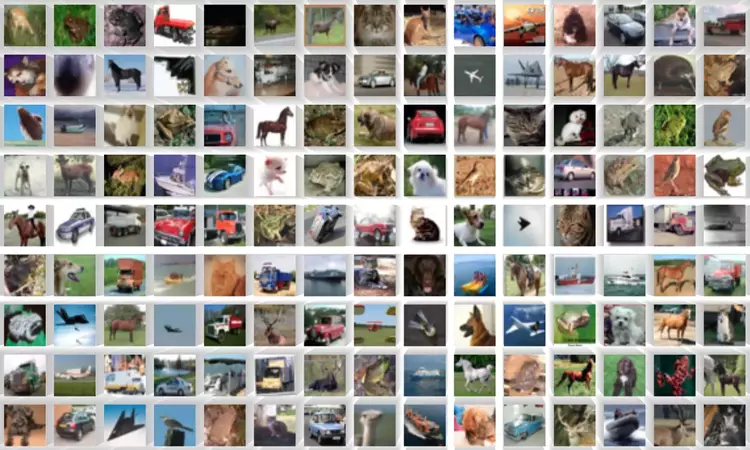

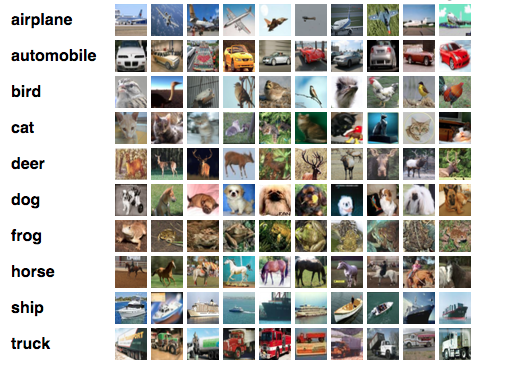

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 38s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

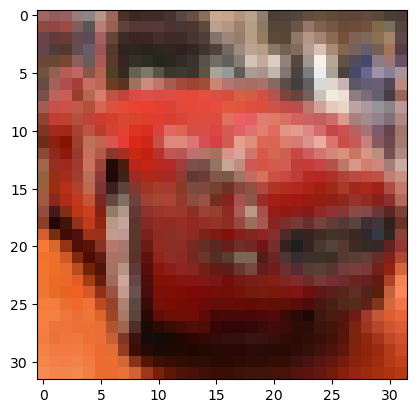

In [7]:
plt.imshow(X_train[5])

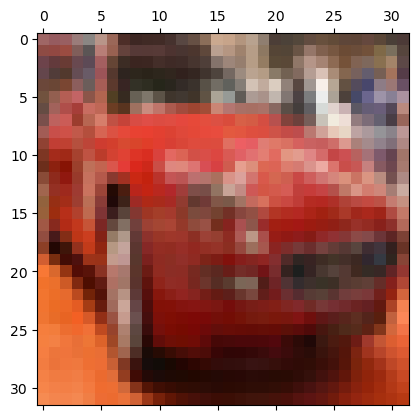

In [8]:
plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

37998

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([41290, 41215, 23849, 45475, 10980,  2871, 41833, 25773, 27530,
        2311, 21009,  3114, 18865, 26037, 14870, 12415, 35819])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([ 2229, 21955, 30979, 15091, 17764, 19313, 29496, 45992,  3213,
        2526, 20604, 42427, 12578,  2653,  5186,  5691, 14574])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[ 99,  99,  87],
        [ 99,  99,  87],
        [101, 101,  89],
        ...,
        [107, 107,  97],
        [105, 105,  95],
        [104, 104,  94]],

       [[100, 100,  88],
        [100, 100,  88],
        [101, 101,  89],
        ...,
        [108, 108, 100],
        [107, 107,  97],
        [106, 106,  96]],

       [[102, 102,  90],
        [104, 104,  92],
        [105, 105,  93],
        ...,
        [111, 111, 104],
        [110, 110, 100],
        [109, 109,  99]],

       ...,

       [[129, 127, 124],
        [130, 128, 125],
        [131, 130, 126],
        ...,
        [119, 120, 120],
        [121, 120, 118],
        [120, 119, 117]],

       [[125, 124, 120],
        [127, 126, 122],
        [129, 128, 124],
        ...,
        [119, 119, 116],
        [118, 117, 115],
        [117, 116, 114]],

       [[122, 121, 117],
        [123, 122, 118],
        [124, 123, 119],
        ...,
        [117, 116, 112],
        [116, 115, 113],
        [114, 113, 111]]

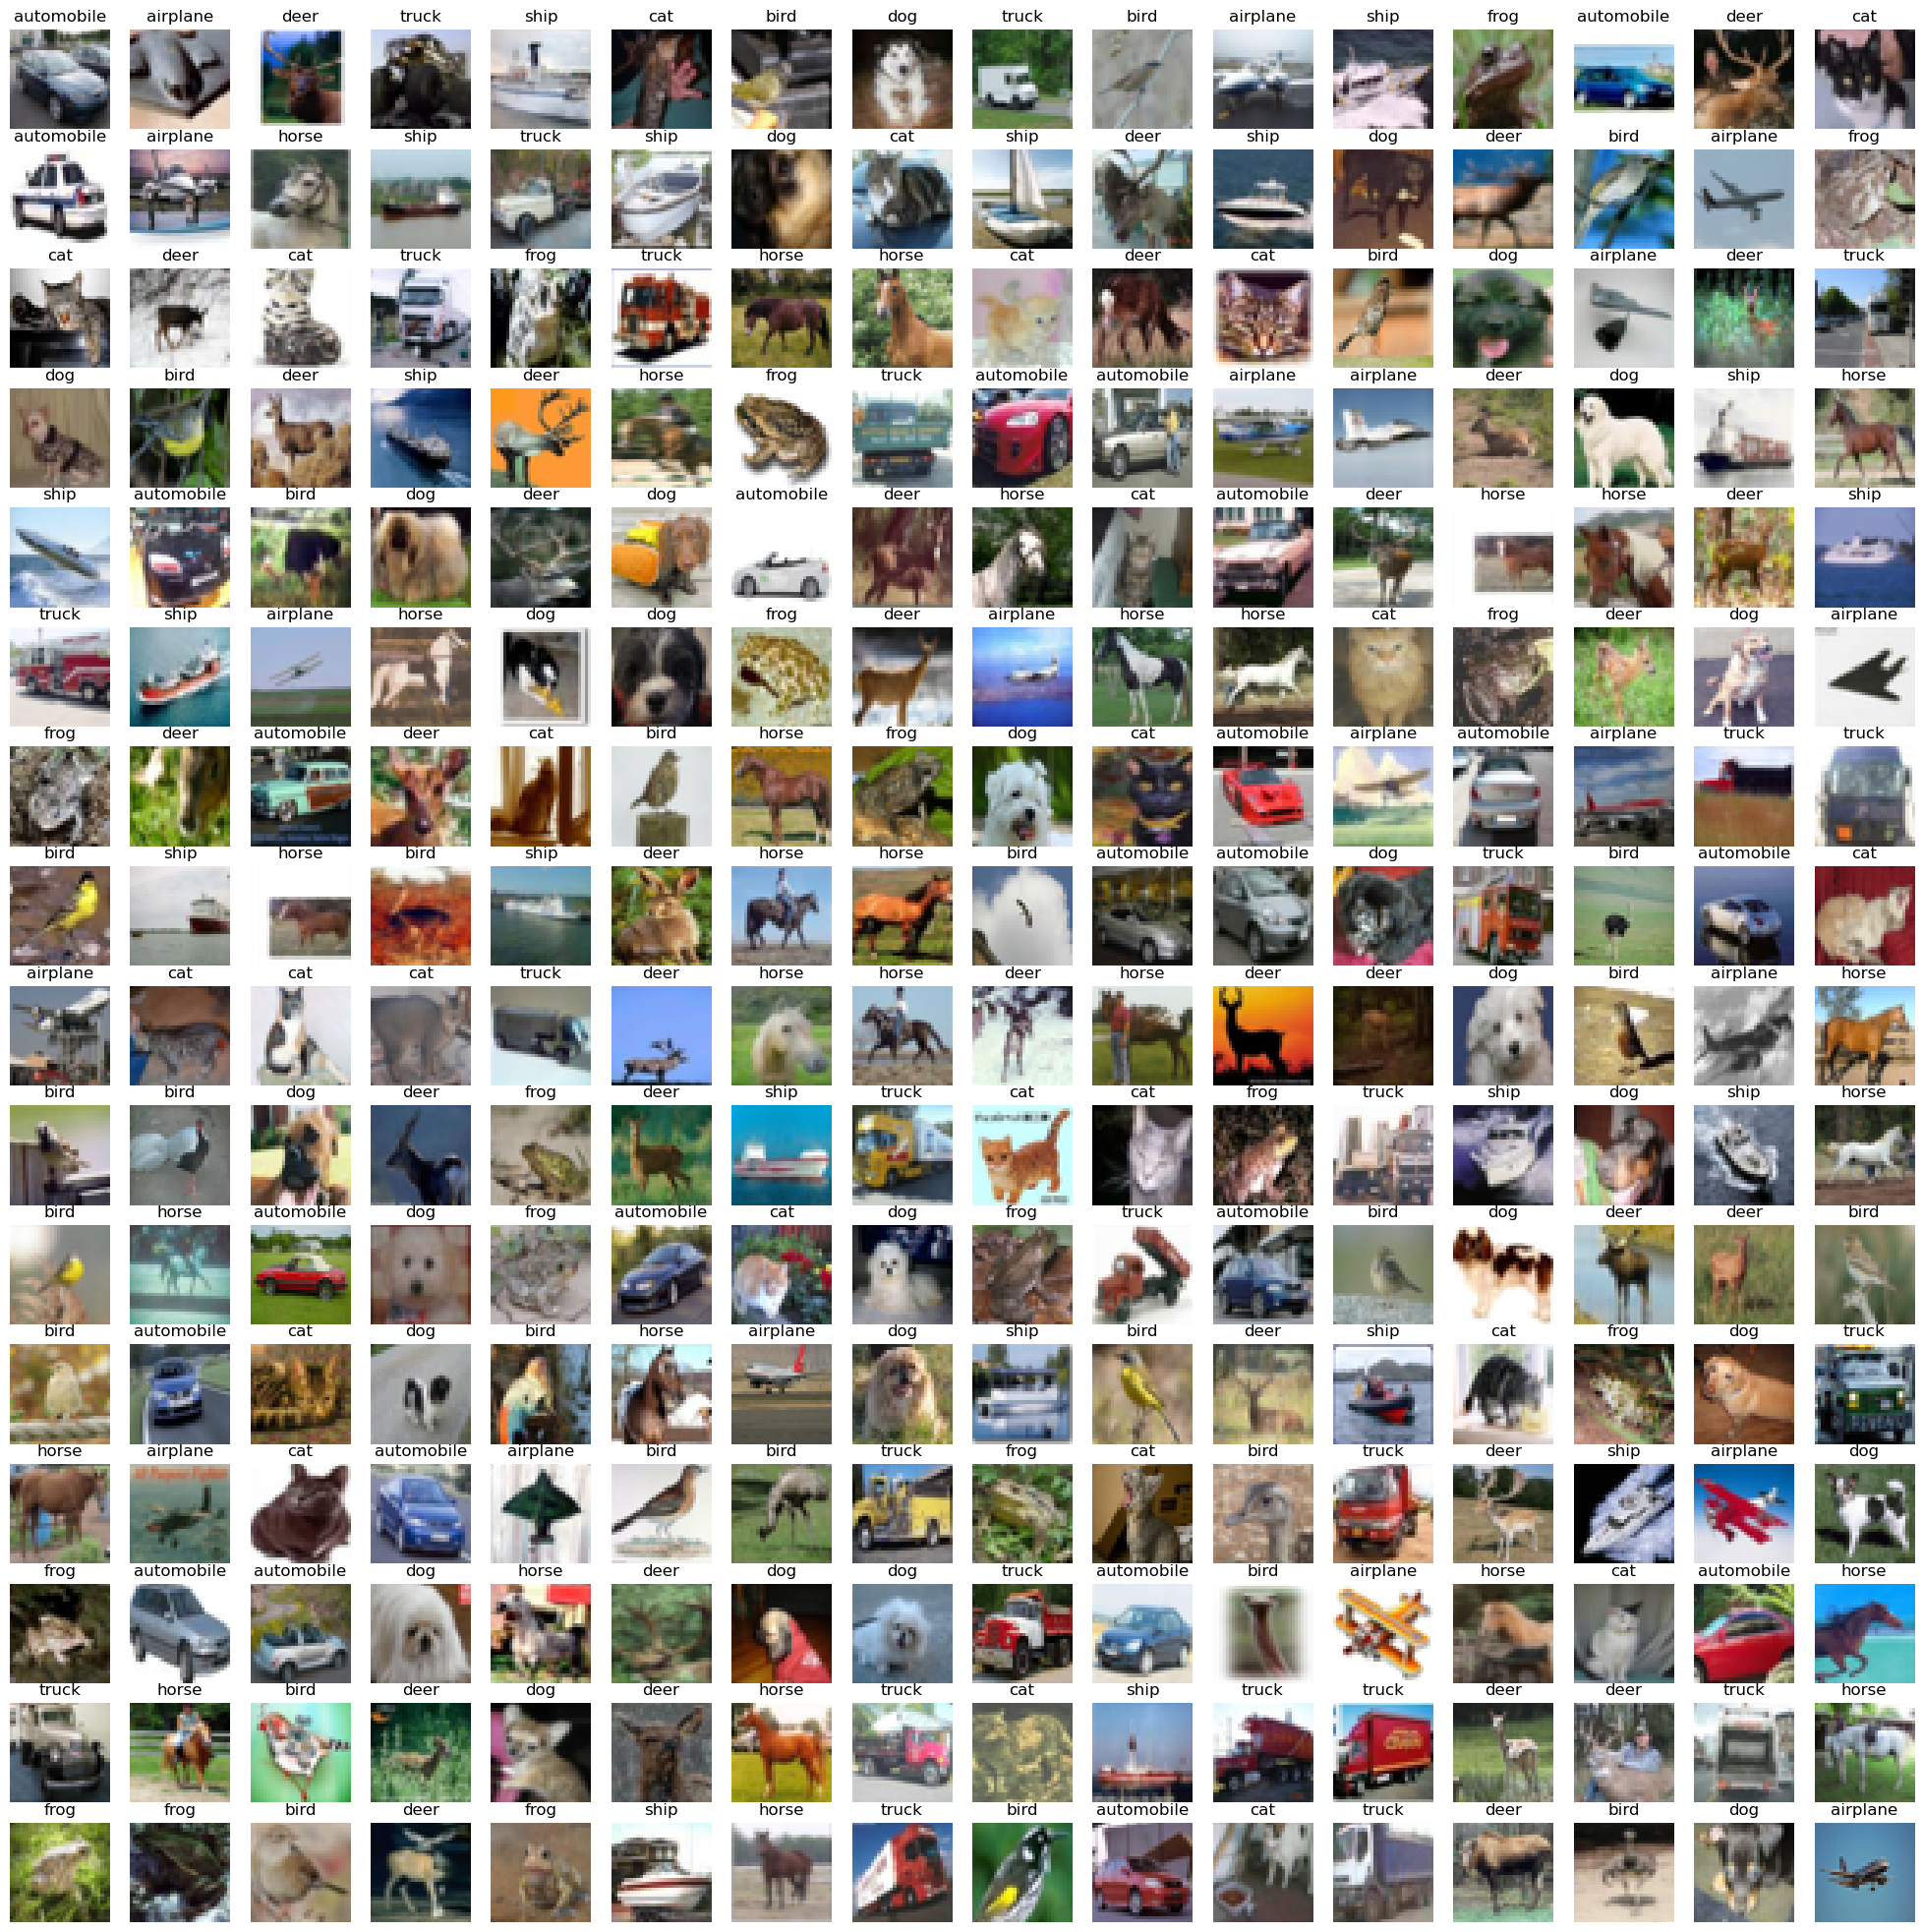

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

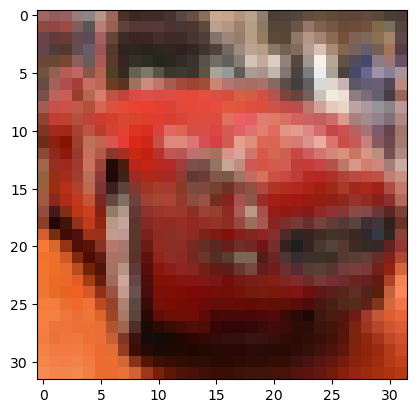

In [26]:
plt.imshow(X_train[5])

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

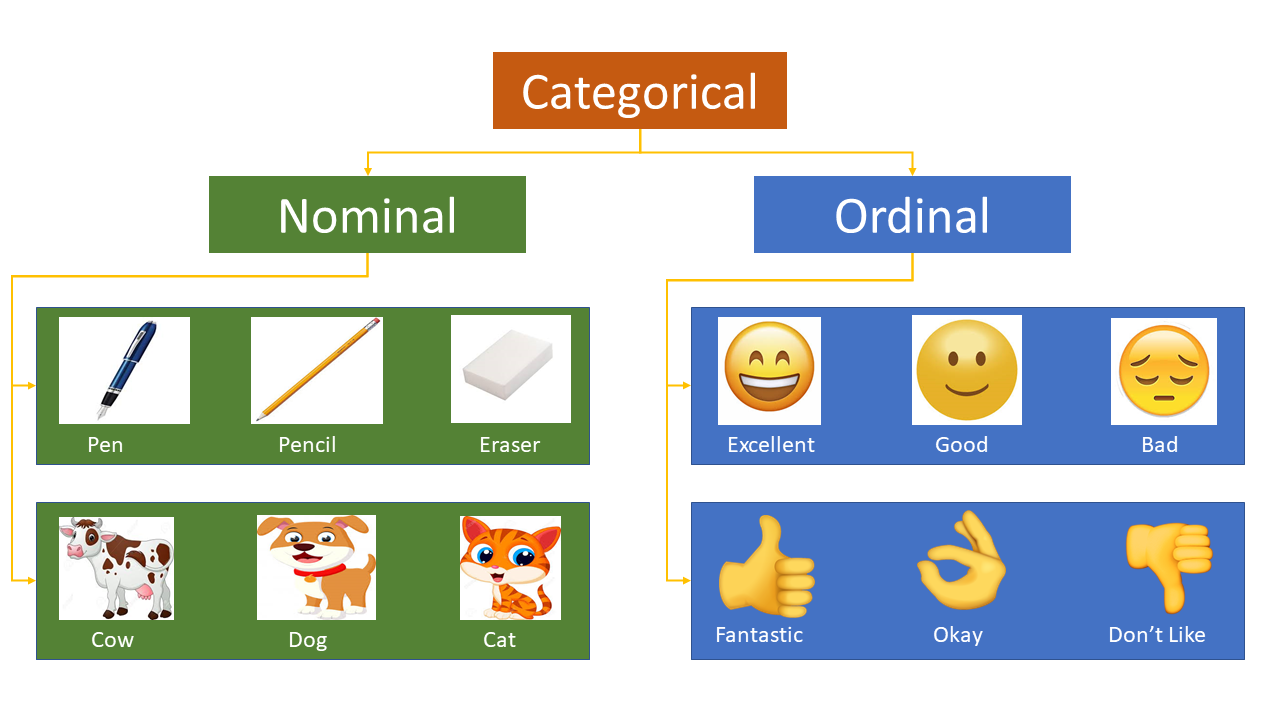

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 156s 99ms/step - loss: 1.4233 - accuracy: 0.4821 - val_loss: 1.1688 - val_accuracy: 0.5836
Epoch 2/50
1563/1563 [==============================] - 152s 97ms/step - loss: 0.9950 - accuracy: 0.6484 - val_loss: 1.0876 - val_accuracy: 0.6294
Epoch 3/50
1563/1563 [==============================] - 165s 106ms/step - loss: 0.8306 - accuracy: 0.7075 - val_loss: 0.8419 - val_accuracy: 0.7046
Epoch 4/50
1563/1563 [==============================] - 154s 99ms/step - loss: 0.7150 - accuracy: 0.7502 - val_loss: 0.8279 - val_accuracy: 0.7141
Epoch 5/50
1563/1563 [==============================] - 162s 104ms/step - loss: 0.6276 - accuracy: 0.7790 - val_loss: 0.8419 - val_accuracy: 0.7148
Epoch 6/50
1563/1563 [==============================] - 165s 105ms/step - loss: 0.5507 - accuracy: 0.8065 - val_loss: 0.8273 - val_accuracy: 0.7210
Epoch 7/50
1563/1563 [==============================] - 169s 108ms/step - loss: 0.4832 - accuracy: 0.8285 - val_los

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.history.history

{'loss': [1.4233293533325195,
  0.995010256767273,
  0.8306375741958618,
  0.7150254845619202,
  0.627622127532959,
  0.5506764650344849,
  0.4831961989402771,
  0.4238426983356476,
  0.36840328574180603,
  0.3172009289264679,
  0.27821531891822815],
 'accuracy': [0.4821000099182129,
  0.648419976234436,
  0.7074599862098694,
  0.7501599788665771,
  0.7790200114250183,
  0.8064600229263306,
  0.8284800052642822,
  0.8496000170707703,
  0.8690199851989746,
  0.887440025806427,
  0.9010999798774719],
 'val_loss': [1.1687670946121216,
  1.0876439809799194,
  0.841935932636261,
  0.8278881907463074,
  0.8418511748313904,
  0.8272532224655151,
  0.8488503694534302,
  0.9517043232917786,
  0.9812108278274536,
  1.0544638633728027,
  1.1283282041549683],
 'val_accuracy': [0.5835999846458435,
  0.6294000148773193,
  0.7045999765396118,
  0.7141000032424927,
  0.7148000001907349,
  0.7210000157356262,
  0.7233999967575073,
  0.7141000032424927,
  0.7263000011444092,
  0.7139000296592712,
  0.72

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.423329,0.48210,1.168767,0.5836
1,0.995010,0.64842,1.087644,0.6294
2,0.830638,0.70746,0.841936,0.7046
3,0.715025,0.75016,0.827888,0.7141
4,0.627622,0.77902,0.841851,0.7148


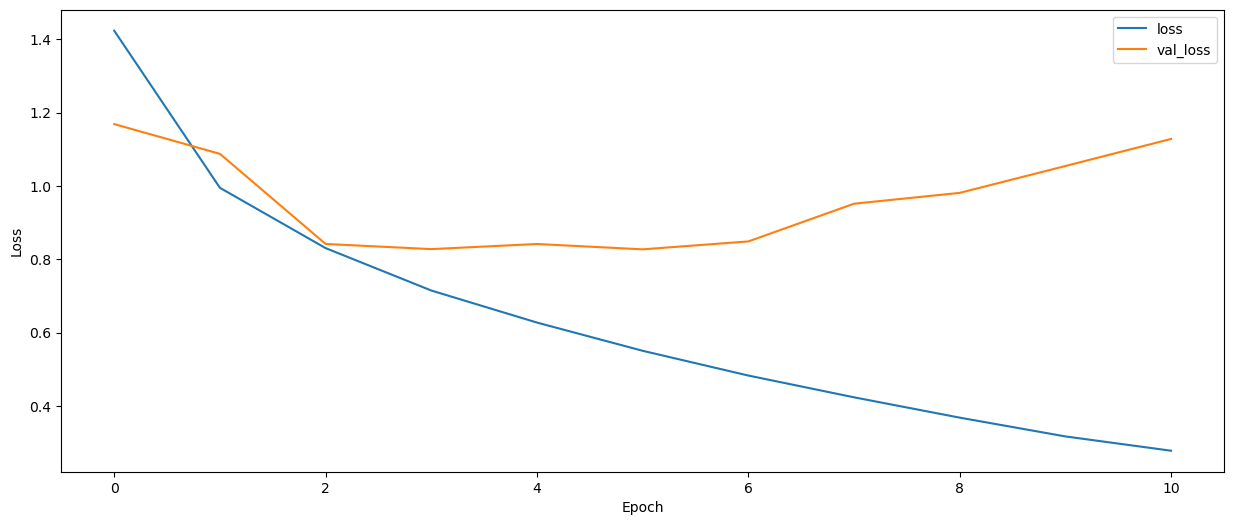

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

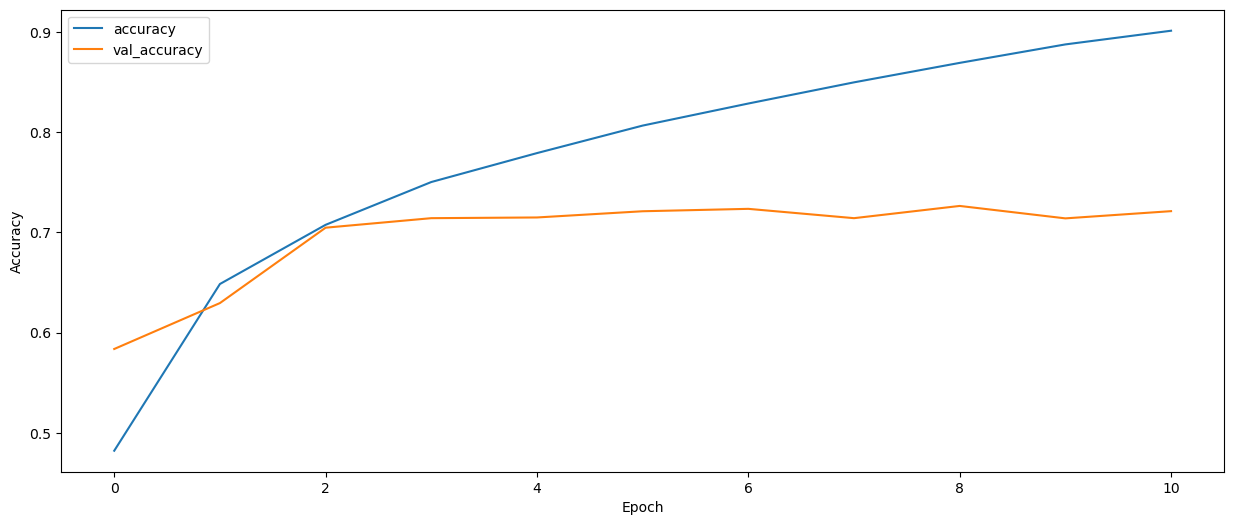

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 7s 21ms/step - loss: 1.1283 - accuracy: 0.7211
[1.1283282041549683, 0.7210999727249146]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix #yeni versionlarda bu fonksiyon yok. eskilerde var

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\pir23oguz\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [44]:
preds = model.predict(X_test)


313/313 [==============================] - 6s 18ms/step


In [45]:
predictions = np.argmax(preds, axis=1)

In [46]:
predictions

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75      1000
           1       0.85      0.83      0.84      1000
           2       0.61      0.61      0.61      1000
           3       0.53      0.54      0.53      1000
           4       0.70      0.63      0.66      1000
           5       0.67      0.56      0.61      1000
           6       0.79      0.81      0.80      1000
           7       0.70      0.81      0.75      1000
           8       0.86      0.83      0.85      1000
           9       0.85      0.77      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[825   9  43  21  15   7  14  15  32  19]
 [ 40 826   8  15   0   4   8   3  32  64]
 [ 88   8 614  62  74  44  43  48  10   9]
 [ 33  11  79 542  55 128  64  61  16  11]
 [ 21   1 104  78 628  22  51  87   5   3]
 [ 22   5  55 189  42 559  26  89   6   7]
 [ 10   6  51  57  29  18 815   5   5   4]
 [ 18   2  40  38  42  41   2 809   2   6]
 [ 79  26  13   9   8   4   7  13 828  13]
 [ 77  73   4  17   7   4   4  26  23 765]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1283282041549683
Test accuracy: 0.7210999727249146


In [50]:
my_image = X_test[44]

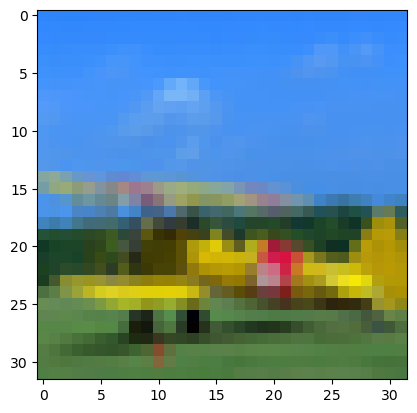

In [51]:
plt.imshow(my_image)

In [52]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 189ms/step


In [53]:
image_prediction

array([[9.9954236e-01, 3.6005389e-05, 7.7312473e-07, 5.8935396e-12,
        1.2646391e-08, 1.1417696e-12, 9.1028896e-14, 7.1213300e-08,
        4.0510154e-06, 4.1682582e-04]], dtype=float32)

In [54]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [55]:
result=np.argmax(image_prediction, axis=1)

In [56]:
result

array([0], dtype=int64)

In [57]:
classes[int(result)]

'airplane'

In [58]:
#model.save("cnn-1.h5")

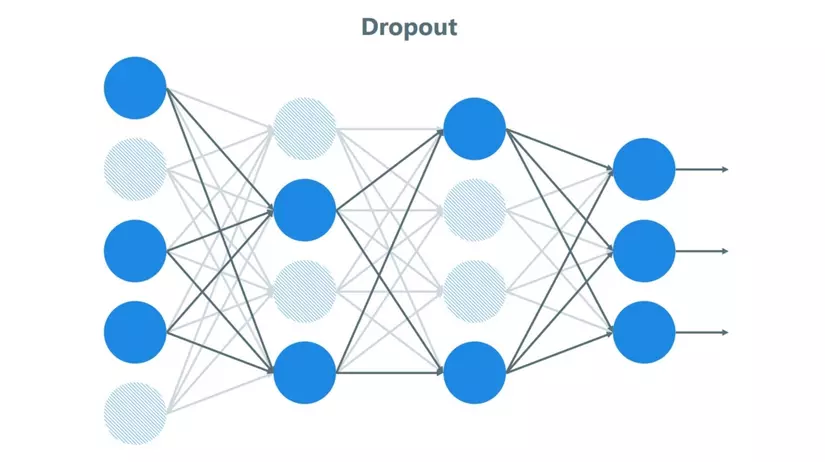

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [60]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 208s 132ms/step - loss: 1.3730 - accuracy: 0.5054 - val_loss: 1.0478 - val_accuracy: 0.6317
Epoch 2/100
1563/1563 [==============================] - 220s 141ms/step - loss: 0.9758 - accuracy: 0.6569 - val_loss: 0.8466 - val_accuracy: 0.7048
Epoch 3/100
1563/1563 [==============================] - 206s 132ms/step - loss: 0.8344 - accuracy: 0.7073 - val_loss: 0.8052 - val_accuracy: 0.7181
Epoch 4/100
1563/1563 [==============================] - 198s 127ms/step - loss: 0.7493 - accuracy: 0.7372 - val_loss: 0.7572 - val_accuracy: 0.7404
Epoch 5/100
1563/1563 [==============================] - 195s 125ms/step - loss: 0.6769 - accuracy: 0.7621 - val_loss: 0.7166 - val_accuracy: 0.7522
Epoch 6/100
1563/1563 [==============================] - 196s 125ms/step - loss: 0.6186 - accuracy: 0.7821 - val_loss: 0.6920 - val_accuracy: 0.7576
Epoch 7/100
 917/1563 [================>.............] - ETA: 1:18 - loss: 0.5575 - accuracy: 0.8023

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

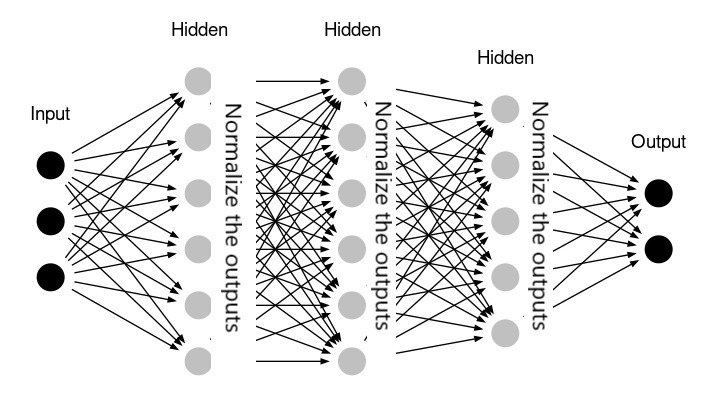

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

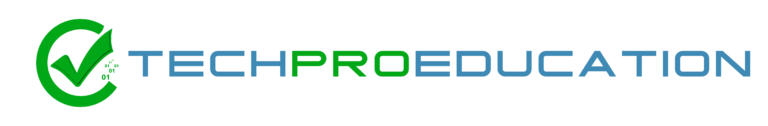